# **INSTALAR LIBRERIAS**

In [ ]:
import pandas as pd
import numpy as np
import openpyxl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
nltk.download('punkt')
from collections import Counter

In [ ]:
#INSTALAR STOPWORDS PARA ELIMINAR ESPECIFICAS EN ESPAÑOL
!pip install stop-words


  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=f50eed6913f3d5ca6a3fe2a5429c477fc4a21995550536e634e80937aae75acb
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [ ]:
#STOPWORDS EN ESPAÑOL
from stop_words import get_stop_words

stop_words = get_stop_words('es')

#**IMPORTAR EL ARCHIVO DE EXCEL CON LAS HISTORIAS CLINICAS**

In [ ]:
#CREAR UN DF DE PANDAS
df = pd.read_excel('/content/EHRFINAL.xlsx')

In [ ]:
#ELIMINAR LOS SALTOS DE PARRAFO
df['DATOS'] = df['DATOS'].astype(str).apply(openpyxl.utils.escape.unescape)
df['DATOS'] = df['DATOS'].str.replace('\r\n', '')
df['DATOS'] = df['DATOS'].str.replace('\n', '')
df = df[['ID','DATOS']]

In [ ]:
print(df)

         ID                                              DATOS  word_count
0    653999  EDAD: 68.ENFERMEDAD ACTUAL: motivo de consulta...          79
1    956774  EDAD: 57.ENFERMEDAD ACTUAL: motivo de consulta...         155
2    469040  EDAD: 52.ENFERMEDAD ACTUAL: motivo de consulta...         103
3    767542  EDAD: 79.ENFERMEDAD ACTUAL: motivo de consulta...          94
4    712121  EDAD: 76.ENFERMEDAD ACTUAL: motivo de consulta...         104
..      ...                                                ...         ...
158  678316  EDAD: 53.ENFERMEDAD ACTUAL: remitido para tami...         121
159  893719  EDAD: 64.ENFERMEDAD ACTUAL: motivo de consulta...         131
160  395804  EDAD: 58.ENFERMEDAD ACTUAL: motivo de consulta...         122
161  568974  EDAD: 79.ENFERMEDAD ACTUAL:hace 2 meses tuvo e...         130
162  946936  EDAD: 56.ENFERMEDAD ACTUAL: motivo de consulta...         105

[163 rows x 3 columns]


#**ANALISIS DESCRIPTIVO**

##**PALABRAS TOTALES Y PROMEDIO POR REGISTRO**

In [ ]:
# Se crea un funcion para contar las palabras por cada registro
def count_words(texto):
    # Se divide por espacios
    words = texto.split()
    # Se cuentan las palabras
    return len(words)

# Aplicar la funcion al df
df['word_count'] = df['DATOS'].apply(count_words)

# Calcular el promedio de palabras por registro
average_word_count = df['word_count'].mean()

# Mostrar el promedio
print(f"El promedio de palabras por registro en la columna 'DATOS' es: {average_word_count:.2f}")

El promedio de palabras por registro en la columna 'DATOS' es: 119.21


In [ ]:
print(df)

         ID                                              DATOS  word_count
0    653999  EDAD: 68.ENFERMEDAD ACTUAL: motivo de consulta...          79
1    956774  EDAD: 57.ENFERMEDAD ACTUAL: motivo de consulta...         155
2    469040  EDAD: 52.ENFERMEDAD ACTUAL: motivo de consulta...         103
3    767542  EDAD: 79.ENFERMEDAD ACTUAL: motivo de consulta...          94
4    712121  EDAD: 76.ENFERMEDAD ACTUAL: motivo de consulta...         104
..      ...                                                ...         ...
158  678316  EDAD: 53.ENFERMEDAD ACTUAL: remitido para tami...         121
159  893719  EDAD: 64.ENFERMEDAD ACTUAL: motivo de consulta...         131
160  395804  EDAD: 58.ENFERMEDAD ACTUAL: motivo de consulta...         122
161  568974  EDAD: 79.ENFERMEDAD ACTUAL:hace 2 meses tuvo e...         130
162  946936  EDAD: 56.ENFERMEDAD ACTUAL: motivo de consulta...         105

[163 rows x 3 columns]


In [ ]:
#UNIR LAS HISTORIAS PARA CONTAR LAS PALABRAS EN TOTAL
text = " ".join(dato for dato in df['DATOS'])
print ("Se encuentran {} palabras en total en el archivo de registros clinicos".format(len(text)))

Se encuentran 166152 palabras en total en el archivo de registros clinicos


##**WORDCLOUD**

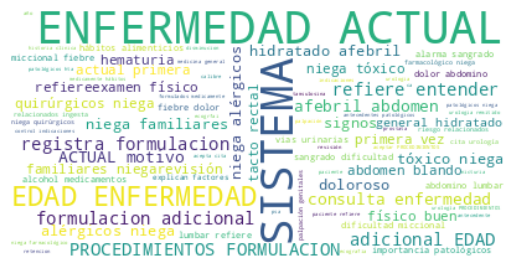

In [ ]:
stopwords = set(stop_words)

# GENERAR LA WORDCLOUD
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# MOSTRAR LA IMAGEN:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##**CONTEO DE PALABRAS POR FRECUENCIA**

In [ ]:
#realizar el conteo de palabras por frecuencia

# Tokenizar el texto en palabras
words = nltk.word_tokenize(text)

# Filtrar las stopwords descargadas y signos de puntuacion del texto
stop_words += ['.', ',', ':', ';', '(', ')', "'", '"', '!', '?', '-', '--', '``', "''", '...', '“','..','/', '”']
filtered_words = [word for word in words if word.lower() not in stop_words]

# Contar la frecuencia de cada palabra filtrada
word_freq = Counter(filtered_words)

# Obtener las 10 palabras más frecuentes
top_10_words = word_freq.most_common(10)

# Mostrar las 10 palabras más frecuentes
for word, freq in top_10_words:
    print(f"{word}: {freq}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


refiere: 215
miccional: 175
EDAD: 163
ACTUAL: 163
FORMULACION: 163
SISTEMA: 163
sistemas: 160
paciente: 155
entender: 154
PROCEDIMIENTOS: 154
